---
# **``Statistical Hypothesis Testing``**
### **``Practical Scenarios``**
---

## $$**Contents**$$
1. [Python Stats Libraries](#Python_Stats_Pkgs)
2. [One Population](#One_Population)
    1. [T Test or STUDENT-T or STUDENT Test](#Small_Samples)
    2. [Z Test](#Large_Samples)
    3. [Population Proportion](#POPULATION_PROPORTION)
    4. [Chi-Square Test](#CHI_SQUARE_TEST)
3. [Two Populations](#Two_Populations)
    1. [Large Independent Samples](#Large_Independent_Samples)
        1. [Pooled Large Independent Samples](#Pooled_Large_Independent_Samples)
        2. [Not-Pooled Large Independent Samples](#Not-Pooled_Large_Independent_Samples)
    2. [Small Independent Samples](#Small_Independent_Samples)
        1. [Pooled Small Independent Samples](#Pooled_Small_Independent_Samples)
        2. [Not Pooled Small Independent Samples](#Not-Pooled_Small_Independent_Samples)
    3. [Population Proportions](#Population_Proportions)
        1. [Large Independent Proportions -- Z Test](#Large_Independent_Proportions)
    4. [Dependent Samples](#Dependent_Samples)
        1. [Small Dependent Samples -- T Test](#Small_Dependent_Samples)
    5. [F-Distribution (2 variances or standard deviations)](#F-Distribution)
4. [ANOVA](#ANOVA)
    1. [One-Way](#One-Way)
        1. [Post-Hoc Analysis](#Post_HOC_Analysis)
        2. [Test Assumptions](#Assumptions_test)
    1. [Two-way or Two-factor](#Two_way_ANOVA)
        1. [Without Replication](#without_replication)
            1. [Post-Hoc Analysis](#Post_HOC_Analysis)
            2. [Test Assumptions](#Assumptions_test)
        2. [With Replication](#with_replication)
            1. [Post-Hoc Analysis](#Post_HOC_Analysis)
            2. [Test Assumptions](#Assumptions_test)
5. [Distribution Functions](#Distribution_Functions)

## **``Python_Stats_Pkgs``**
---

Import handmade image here

##### **Python packages primarily used for statistical testing**

In [185]:
from statsmodels import api as sm

In [186]:
dir(sm.stats)

['CompareCox',
 'CompareJ',
 'CompareMeans',
 'DescrStatsW',
 'Describe',
 'FTestAnovaPower',
 'FTestPower',
 'FactoredPSDMatrix',
 'GofChisquarePower',
 'HetGoldfeldQuandt',
 'Mediation',
 'NormalIndPower',
 'NullDistribution',
 'RegressionFDR',
 'Runs',
 'SquareTable',
 'StratifiedTable',
 'TTestIndPower',
 'TTestPower',
 'Table',
 'Table2x2',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'acorr_breusch_godfrey',
 'acorr_ljungbox',
 'anova_lm',
 'binom_test',
 'binom_test_reject_interval',
 'binom_tost',
 'binom_tost_reject_interval',
 'breaks_cusumolsresid',
 'breaks_hansen',
 'chisquare_effectsize',
 'cochrans_q',
 'compare_cox',
 'compare_j',
 'corr_clipped',
 'corr_nearest',
 'corr_nearest_factor',
 'corr_thresholded',
 'cov_cluster',
 'cov_cluster_2groups',
 'cov_hac',
 'cov_hc0',
 'cov_hc1',
 'cov_hc2',
 'cov_hc3',
 'cov_nearest',
 'cov_nearest_factor_homog',
 'cov_nw_panel',
 'cov_white_simple',
 'diagnostic'

In [187]:
from statsmodels.stats import weightstats

In [188]:
dir(weightstats)

['CompareMeans',
 'DescrStatsW',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_tconfint_generic',
 '_tstat_generic',
 '_zconfint_generic',
 '_zstat_generic',
 '_zstat_generic2',
 'cache_readonly',
 'np',
 'stats',
 'ttest_ind',
 'ttost_ind',
 'ttost_paired',
 'zconfint',
 'ztest',
 'ztost']

In [189]:
import scipy.stats as scipy_tests

In [190]:
dir(scipy_tests)

['PearsonRConstantInputWarning',
 'PearsonRNearConstantInputWarning',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_binned_statistic',
 '_constants',
 '_continuous_distns',
 '_discrete_distns',
 '_distn_infrastructure',
 '_distr_params',
 '_hypotests',
 '_multivariate',
 '_rvs_sampling',
 '_stats',
 '_stats_mstats_common',
 '_tukeylambda_stats',
 'absolute_import',
 'alpha',
 'anderson',
 'anderson_ksamp',
 'anglit',
 'ansari',
 'arcsine',
 'argus',
 'bartlett',
 'bayes_mvs',
 'bernoulli',
 'beta',
 'betaprime',
 'binned_statistic',
 'binned_statistic_2d',
 'binned_statistic_dd',
 'binom',
 'binom_test',
 'boltzmann',
 'boxcox',
 'boxcox_llf',
 'boxcox_normmax',
 'boxcox_normplot',
 'bradford',
 'brunnermunzel',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'chi2_contingency',
 'chisquare',
 'circmean',
 'circstd',
 'circvar',
 'combine_pvalues',
 'contingency',
 'cosine',
 'crystalball',

##### **Other supporting packages**

In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import statsmodels.api as sm
import statsmodels.stats.weightstats as s_tests
import scipy.stats as scipy_tests

---
# **``One_Population``**
---

Import hand made image here

## **Small_Samples**
#### ***T or STUDENT or STUDENT-T TESTING***
---

#### ***Question-1*** :: **A researcher thinks that average age of males getting married in Delhi is not more than 30. He samples 21 males and found that his claim is true. Test the claim at 95% level of confidence.**

In [192]:
sample_age = np.array([20,33,22,24,25,26,27,28,21,34,33,32,31,22,23,24,24,24,25,26,27])

In [193]:
len(sample_age)

21

In [194]:
sample_mean = sample_age.mean()

In [195]:
sample_mean

26.238095238095237

In [196]:
sample_std_dev = sample_age.var()

In [197]:
sample_std_dev

16.562358276643995

In [198]:
results = scipy_tests.ttest_1samp(sample_age,30)

In [199]:
results

Ttest_1sampResult(statistic=-4.133916563687664, pvalue=0.0005143638120022441)

In [200]:
results[0]

-4.133916563687664

In [201]:
results[1]

0.0005143638120022441

#### ***CASE - I :: With 95% Level of Confidence***

In [202]:
alpha = 0.05
if (results[0] < 0) & (results[1] <= alpha):
    print("Reject the Null Hypothesis at {} level of significance".format(alpha))
else:
    print("Fail to reject the Null Hypothesis at {} level of significance".format(alpha))

Reject the Null Hypothesis at 0.05 level of significance


##### ***Test Statistic :: Manual Calculation***

In [203]:
(sample_age.mean()-30)/(np.sqrt(sample_std_dev/len(sample_age)))

-4.236003949869238

In [204]:
(sample_age.mean()-30)/(np.sqrt(sample_std_dev/(len(sample_age)-1)))

-4.133916563687664

#### ***Difference in Test statistic value is because Python Statsmodels use DOF in the denominator instead of 'n' i.e. the number of records in sample.*** 


***Go to location ::*** c:\programdata\anaconda3\lib\site-packages\scipy\stats\


***Open python file ::*** stats.py

#### **Implementation in Statsmodels**

In [205]:
np.var(sample_age, 0, ddof=1)

17.390476190476193

In [206]:
np.var(sample_age, 0)

16.562358276643995

#### ***CASE - II :: With 99% Level of Confidence***

In [207]:
alpha = 0.01
if (results[0] < 0) & (results[1] <= alpha):
    print("Reject the Null Hypothesis at {} level of significance".format(alpha))
else:
    print("Fail to reject the Null Hypothesis at {} level of significance".format(alpha))

Reject the Null Hypothesis at 0.01 level of significance


#### ***Question-2*** :: **A researcher claims that average age of people buying their first car is greater than 26. He sampled ages of 24 people and found that his claim is true. Test the claim at 90% level of confidence.**

In [208]:
first_car_sample = [22,23,33,32,31,30,27,28,29,20,30,30,31,31,32,34,27,28,24,24,24,25,26,26]

In [209]:
len(first_car_sample)

24

In [210]:
first_car_sample_mean = round(np.mean(first_car_sample,dtype=float),3)

In [211]:
first_car_sample_mean

27.792

In [212]:
first_car_sample_stddev = round(np.std(first_car_sample,dtype=float,ddof=0),3)

In [213]:
first_car_sample_stddev

3.674

In [214]:
results = scipy_tests.ttest_1samp(first_car_sample,26)

In [215]:
results

Ttest_1sampResult(statistic=2.338741244971851, pvalue=0.02840406196767573)

#### ***CASE - I :: With 90% Level of Confidence***

In [216]:
loc = 0.90
alpha= 1-loc

if (results[0] > 0) & (results[1] < alpha):
    print("Researcher claim is right and he rejected the Null Hypothesis at {} L.O.C and {} L.O.S".format(loc,round(alpha,2)))
else:
    print("Researcher claim is wrong and he fail to reject the Null Hypothesis at {} L.O.C and {} L.O.S".format(loc,round(alpha,2)))

Researcher claim is right and he rejected the Null Hypothesis at 0.9 L.O.C and 0.1 L.O.S


#### ***CASE - II :: With 99% Level of Confidence***

In [217]:
loc = 0.99
alpha= 1-loc

if (results[0] > 0) & (results[1] < alpha):
    print("Researcher claim is right and he rejected the Null Hypothesis at {} L.O.C and {} L.O.S".format(loc,round(alpha,2)))
else:
    print("Researcher claim is wrong and he fail to reject the Null Hypothesis at {} L.O.C and {} L.O.S".format(loc,round(alpha,2)))

Researcher claim is wrong and he fail to reject the Null Hypothesis at 0.99 L.O.C and 0.01 L.O.S


#### ***Question-3*** :: **A researcher claims that average height of people living in India is not 160 cms. He sampled heights of 25 people and found that his claim is true. Test the claim at different level of confidences 85%, 95% and 99%.**

In [218]:
avg_height_sample = np.array([100,140,160,150,145,130,130,150,150,165,165,164,160,165,180,182,182,184,183,177,178,176,189,193,158])

In [219]:
len(avg_height_sample)

25

In [220]:
avg_height_sample_mean = round(np.mean(avg_height_sample,dtype=float),3)

In [221]:
avg_height_sample_mean

162.24

In [222]:
avg_height_sample_variance = np.var(avg_height_sample,dtype=float,ddof=0)

In [223]:
avg_height_sample_variance

462.6624

In [224]:
avg_height_sample_stddev = round(np.sqrt(avg_height_sample_variance),3)

In [225]:
avg_height_sample_stddev

21.51

In [226]:
pop_mean = 160

test_stats_height = scipy_tests.ttest_1samp(avg_height_sample,pop_mean)

In [227]:
test_stats_height

Ttest_1sampResult(statistic=0.5101777757069099, pvalue=0.614587179842627)

In [228]:
def hyp_test(test_stats_result,loc,kind_of_test=['l','r','lr']):
    alpha = 1 - loc
    if (kind_of_test == 'l') & (test_stats_result[0] < 0) & (test_stats_result[1] < alpha):
        print("Researcher claim is right. Thus, rejected the Null Hypothesis at {} L.O.C and {} L.O.S".format(loc,round(alpha,2)))
    elif (kind_of_test == 'r') & (test_stats_result[0] > 0) & (test_stats_result[1] < alpha):
        print("Researcher claim is right. Thus, rejected the Null Hypothesis at {} L.O.C and {} L.O.S".format(loc,round(alpha,2)))
    elif (kind_of_test == 'lr') & (test_stats_result[1] < alpha):    
        print("Researcher claim is right. Thus, rejected the Null Hypothesis at {} L.O.C and {} L.O.S".format(loc,round(alpha,2)))
    else:
        print("Researcher claim is wrong. Thus, fail to reject the Null Hypothesis at {} L.O.C and {} L.O.S".format(loc,round(alpha,2)))

#### ***CASE - I :: With 85% Level of Confidence***

In [229]:
hyp_test(test_stats_height,0.85,'lr')

Researcher claim is wrong. Thus, fail to reject the Null Hypothesis at 0.85 L.O.C and 0.15 L.O.S


#### ***CASE - II :: With 95% Level of Confidence***

In [230]:
hyp_test(test_stats_height,0.95,'lr')

Researcher claim is wrong. Thus, fail to reject the Null Hypothesis at 0.95 L.O.C and 0.05 L.O.S


#### ***CASE - III :: With 99% Level of Confidence***

In [231]:
hyp_test(test_stats_height,0.99,'lr')

Researcher claim is wrong. Thus, fail to reject the Null Hypothesis at 0.99 L.O.C and 0.01 L.O.S


## **Large_Samples**
#### ***Z TEST***
---

#### ***Question-4*** :: **A beer bottle factory produces atleast 30 cans a day. A newly appointed manager thinks that this number is not correct. He sampled cans production data of 40 random days. Test the claim at 95% level of confidences.**

In [232]:
beer_cans_sample = np.array([12,24,25,36,34,21,23,22,33,22,11,16,17,18,36,32,31,30,30,30,30,30,14,18,19,23,24,27,
                             28,29,26,26,26,23,32,10,9,22,28,29])

In [233]:
beer_cans_sample_mean = round(np.mean(beer_cans_sample,dtype='float'),3)
beer_cans_sample_stddev = round(np.std(beer_cans_sample,dtype='float',ddof=0),3)

In [234]:
beer_cans_sample_mean,beer_cans_sample_stddev

(24.4, 7.056)

In [235]:
beer_cans_results = s_tests.ztest(beer_cans_sample, value=30, alternative='smaller', ddof=0)

In [236]:
beer_cans_results

(-5.019343982920408, 2.592411755802454e-07)

In [237]:
hyp_test(beer_cans_results,0.95,'l')

Researcher claim is right. Thus, rejected the Null Hypothesis at 0.95 L.O.C and 0.05 L.O.S


#### ***Question-5*** :: **The government says that the average weight of males in Canada atleast 162.9 pounds. A researcher thinks this is too high. He sampled data of 39 canadian males. Test the claim at 99% level of confidences.**

In [238]:
canadian_male_sweight = np.array([120,240,250,360,340,210,230,220,330,220,110,160,170,180,360,320,310,300,300,300,300,300,140,
                                  180,190,230,240,270,280,290,260,260,260,230,320,100,90,280,290])

In [239]:
canadian_male_sweight_mean = np.mean(canadian_male_sweight,dtype='float')

In [240]:
canadian_male_sweight_stddev = np.std(canadian_male_sweight,dtype='float')

In [241]:
canadian_male_sweight_mean,canadian_male_sweight_stddev

(244.6153846153846, 71.35487886383511)

In [242]:
canadian_male_sweight_results = s_tests.ztest(canadian_male_sweight, value=162.9, alternative='smaller', ddof=0)

In [243]:
canadian_male_sweight_results

(7.151752220548922, 0.9999999999995716)

In [244]:
hyp_test(canadian_male_sweight_results,0.99,'l')

Researcher claim is wrong. Thus, fail to reject the Null Hypothesis at 0.99 L.O.C and 0.01 L.O.S


#### ***Question-6*** :: **A study showed that on average women in a city had 1.48 kids. A researcher believes this number is incorrect. He surveyed 100 women in the city & finds that on average these women doesn't had 1.48 kids. Test the claim at 90% LOC.**

In [245]:
women_kids_sample = np.random.randint(low=1, high=4, size=100)

In [246]:
women_kids_sample

array([2, 1, 2, 2, 1, 2, 3, 3, 3, 3, 3, 1, 1, 1, 2, 3, 1, 2, 1, 2, 3, 3,
       2, 2, 3, 1, 3, 2, 2, 3, 1, 2, 2, 2, 1, 3, 3, 1, 2, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 2, 3, 2, 1, 1, 1, 2, 3, 1, 1, 1, 3, 1, 3, 2, 3,
       3, 3, 1, 3, 2, 1, 2, 3, 1, 3, 2, 1, 2, 1, 2, 2, 2, 1, 3, 2, 1, 3,
       1, 2, 2, 3, 3, 1, 3, 2, 2, 3, 2, 2])

In [247]:
women_kids_sample_mean = np.mean(women_kids_sample,dtype='float')

In [248]:
women_kids_sample_mean

2.01

In [249]:
women_kids_sample_stddev = np.std(women_kids_sample,dtype='float',ddof=0)

In [250]:
women_kids_sample_stddev

0.7936623967405789

In [251]:
women_kids_sample_results = s_tests.ztest(women_kids_sample, value=1.48, alternative='two-sided', ddof=0)

In [252]:
women_kids_sample_results

(6.677902369781023, 2.4238641429457565e-11)

#### ***CASE - I :: With 90% Level of Confidence***

In [253]:
hyp_test(women_kids_sample_results,0.90,'lr')

Researcher claim is right. Thus, rejected the Null Hypothesis at 0.9 L.O.C and 0.1 L.O.S


#### ***CASE - II :: With 99% Level of Confidence***

In [254]:
hyp_test(women_kids_sample_results,0.99,'lr')

Researcher claim is right. Thus, rejected the Null Hypothesis at 0.99 L.O.C and 0.01 L.O.S


#### ***CASE - III :: Changed the Sample Data***

In [255]:
women_kids_changed_sample = np.random.randint(low=0, high=4, size=100, dtype='int')

In [256]:
women_kids_changed_sample

array([2, 0, 2, 3, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1, 3, 0, 1, 1, 2,
       1, 3, 1, 2, 2, 0, 0, 1, 1, 3, 2, 3, 2, 3, 3, 2, 3, 2, 2, 1, 0, 3,
       0, 0, 3, 1, 3, 3, 0, 3, 3, 0, 2, 0, 2, 0, 0, 1, 1, 3, 0, 3, 0, 1,
       0, 2, 3, 3, 2, 0, 2, 1, 1, 1, 2, 1, 0, 3, 3, 2, 0, 3, 1, 2, 0, 2,
       0, 2, 0, 3, 3, 0, 2, 3, 0, 2, 1, 1])

In [257]:
women_kids_changed_sample_mean = np.mean(women_kids_changed_sample,dtype='float')

In [258]:
women_kids_changed_sample_mean

1.51

In [259]:
women_kids_changed_sample_stddev = np.std(women_kids_changed_sample,ddof=0,dtype='float')

In [260]:
women_kids_changed_sample_stddev

1.0999545445153631

In [261]:
women_kids_changed_sample_results = s_tests.ztest(women_kids_changed_sample, value=1.48, alternative='two-sided', ddof=0)

In [262]:
women_kids_changed_sample_results

(0.2727385431478711, 0.7850542043555141)

In [263]:
hyp_test(women_kids_changed_sample,0.99,'lr')

Researcher claim is right. Thus, rejected the Null Hypothesis at 0.99 L.O.C and 0.01 L.O.S


## **POPULATION_PROPORTION**
- **Using Z Score Chart/Table**
---

#### ***Question-7*** :: **As per the HR co-ordinators of different organizations in Germany, atleast 90% of the interns got permanent employment after completion of their internship. A researcher believes this number is too high. He gathered the interns hiring stats from 200 local companies. Test the claim at 90% and 99% LOC.**

In [264]:
interns_hired_sample = np.random.randint(low=10,high=16,size=200,dtype='int')

In [265]:
interns_hired_sample

array([15, 12, 11, 12, 13, 10, 11, 15, 14, 13, 13, 11, 12, 11, 14, 10, 11,
       11, 14, 13, 12, 14, 13, 11, 11, 14, 15, 12, 14, 13, 14, 13, 14, 12,
       10, 12, 10, 10, 11, 13, 13, 12, 10, 10, 15, 14, 15, 13, 12, 14, 14,
       10, 10, 12, 14, 15, 14, 13, 11, 13, 14, 14, 10, 13, 15, 14, 11, 15,
       14, 15, 15, 12, 10, 15, 11, 13, 10, 12, 15, 13, 13, 12, 11, 10, 13,
       15, 15, 11, 15, 10, 15, 10, 11, 14, 10, 13, 15, 15, 12, 14, 11, 12,
       12, 11, 15, 13, 13, 15, 12, 14, 10, 15, 10, 14, 10, 10, 15, 13, 12,
       10, 12, 15, 12, 11, 13, 15, 11, 11, 12, 14, 13, 11, 14, 14, 13, 13,
       12, 14, 13, 14, 10, 12, 15, 14, 14, 14, 11, 15, 14, 14, 10, 10, 14,
       14, 14, 15, 11, 13, 12, 15, 14, 11, 12, 13, 12, 15, 15, 15, 13, 15,
       11, 15, 12, 15, 14, 11, 13, 14, 11, 15, 15, 15, 14, 14, 12, 14, 14,
       12, 14, 14, 12, 12, 13, 13, 14, 11, 10, 15, 13, 10])

In [266]:
interns_convereted_as_permanent = interns_hired_sample - np.random.randint(low=1,high=4,size=200,dtype='int')

In [267]:
interns_convereted_as_permanent

array([12, 10,  9,  9, 11,  7,  9, 12, 12, 12, 12,  9,  9,  9, 13,  7,  8,
        9, 12, 12,  9, 11, 12,  8, 10, 13, 13, 10, 12, 11, 13, 12, 11, 10,
        8,  9,  7,  7,  8, 12, 10,  9,  7,  9, 12, 11, 13, 12, 11, 13, 11,
        8,  7,  9, 11, 12, 12, 11, 10, 12, 13, 12,  9, 12, 13, 12, 10, 12,
       11, 12, 12,  9,  8, 12,  8, 11,  7,  9, 13, 12, 11, 10,  8,  9, 10,
       13, 12, 10, 14,  8, 14,  8,  9, 12,  8, 11, 14, 12,  9, 13,  9,  9,
       10, 10, 14, 11, 12, 12,  9, 11,  9, 13,  8, 12,  8,  7, 12, 10, 10,
        8,  9, 12,  9,  8, 11, 14,  8,  8, 10, 13, 12,  9, 11, 13, 11, 11,
       10, 13, 12, 12,  7, 10, 13, 11, 13, 13,  8, 13, 13, 13,  9,  9, 13,
       13, 13, 13,  8, 10,  9, 12, 13,  9, 11, 10,  9, 14, 14, 14, 10, 14,
        8, 14, 10, 12, 13, 10, 12, 13,  9, 12, 13, 14, 11, 12, 11, 13, 12,
       11, 13, 12, 10,  9, 11, 11, 12,  9,  7, 14, 12,  7])

In [268]:
interns_sample_prop = interns_convereted_as_permanent/interns_hired_sample

In [269]:
interns_sample_prop

array([0.8       , 0.83333333, 0.81818182, 0.75      , 0.84615385,
       0.7       , 0.81818182, 0.8       , 0.85714286, 0.92307692,
       0.92307692, 0.81818182, 0.75      , 0.81818182, 0.92857143,
       0.7       , 0.72727273, 0.81818182, 0.85714286, 0.92307692,
       0.75      , 0.78571429, 0.92307692, 0.72727273, 0.90909091,
       0.92857143, 0.86666667, 0.83333333, 0.85714286, 0.84615385,
       0.92857143, 0.92307692, 0.78571429, 0.83333333, 0.8       ,
       0.75      , 0.7       , 0.7       , 0.72727273, 0.92307692,
       0.76923077, 0.75      , 0.7       , 0.9       , 0.8       ,
       0.78571429, 0.86666667, 0.92307692, 0.91666667, 0.92857143,
       0.78571429, 0.8       , 0.7       , 0.75      , 0.78571429,
       0.8       , 0.85714286, 0.84615385, 0.90909091, 0.92307692,
       0.92857143, 0.85714286, 0.9       , 0.92307692, 0.86666667,
       0.85714286, 0.90909091, 0.8       , 0.78571429, 0.8       ,
       0.8       , 0.75      , 0.8       , 0.8       , 0.72727

In [270]:
interns_sample_prop_mean = round(np.mean(interns_sample_prop,dtype='float'),4)

In [271]:
interns_sample_prop_mean

0.8368

In [272]:
interns_sample_prop_stddev = round(np.std(interns_sample_prop),4)

In [273]:
interns_sample_prop_stddev

0.0723

In [274]:
interns_hired_sample_results = sm.stats.proportions_ztest(interns_sample_prop_mean*200,nobs=200,value=0.90,alternative='smaller'
                                                          ,prop_var=0.90)

In [275]:
interns_hired_sample_results

(-2.9792765713993274, 0.001444649289398938)

#### ***CASE - I :: With 90% Level of Confidence***

In [276]:
hyp_test(interns_hired_sample_results,0.90,'l')

Researcher claim is right. Thus, rejected the Null Hypothesis at 0.9 L.O.C and 0.1 L.O.S


#### ***CASE - II :: With 99% Level of Confidence***

In [277]:
hyp_test(interns_hired_sample_results,0.99,'l')

Researcher claim is right. Thus, rejected the Null Hypothesis at 0.99 L.O.C and 0.01 L.O.S


## **CHI_SQUARE_TEST**
---

#### ***Question-8*** :: **A pencil manufacturer requires that the mass of their pencils have S.D that won't exceed 0.08 gms. An inspector thinks that the S.D is larger. He samples 30 pencils & finds they have a mean mass of 1.62 gms & S.D 0.0804 gms. Test the claim at 0.05 L.O.S.**

In [278]:
pencils_sample = np.random.randint(1,4,size=30,dtype='int')

In [279]:
pencils_sample

array([2, 3, 3, 3, 3, 1, 2, 3, 2, 1, 2, 1, 1, 1, 1, 2, 3, 1, 2, 2, 1, 3,
       2, 3, 3, 1, 2, 2, 2, 3])

In [280]:
def chi_square_one_pop(f_exp,loc,test_tail=(['l','r','lr']),ddof=False,sample_data=False,sample_stddev=False):
    """
    Description: This function performs the Chi-square test for one population.
    
    Input parameters: It accepts below parameters:
        1. f_exp : Expected Standard Deviation value or Standard Deviation value from population
        2. loc : Level of confidence. Used this parameter to calculate the critical value
        3. test_tail : This parameter represents which kind of test you want to perform
        4. ddof : Degree of freedom. Use this paramter if you want to provide the adhoc value of dof
        5. sample_data : One dimensional array containing the sample data
        6. sample_stddev : You can provide the standard deviation of the sample directly as an input to perform the chi-sqaure test
        
    Returns:
        - In case of 'l' means left-tail test, it returns,
            - test_statistic
            - left critical value
            - p_value
        
        - In case of 'r' means right-tail test, it returns,
            - test_statistic
            - right critical value
            - p_value

        - In case of 'lr' means both-tail test, it returns,
            - test_statistic
            - left critical value
            - right critical value
            - p-value based on left tail
            - p-value based on right tail
"""
    def cal_mean_var_std(input_array):
        """
        Description: This function calculates the mean, variance and standard deviation of the 1 population.
        
        Input: It accepts below inp parameters:
            1. input_array : Sample Population-1
            
        Returns: Population-1:
                    - Mean
                    - Variance
                    - Standard Deviation
        """
        sample_data_mean = round(np.mean(input_array,dtype='float'),3)
        sample_data_stddev = round(np.mean(input_array,dtype='float'),3)
        sample_data_var = round(np.var(input_array,dtype='float'),3)
        return sample_data_mean, sample_data_var, sample_data_stddev
    
    if sample_stddev != False and sample_data == False and ddof != False:
        sample_data_stddev = sample_stddev
        sample_data_var = sample_data_stddev**2
        dof = ddof
    elif sample_data != False and sample_stddev == False and ddof == False:
        sample_data_mean, sample_data_stddev, sample_data_var = cal_mean_var_std(sample_data)
        total_obs = len(sample_data)
        dof = (total_obs-1)
    elif sample_data != False and sample_stddev == False and ddof != False:
        sample_data_mean, sample_data_stddev, sample_data_var = cal_mean_var_std(sample_data)
        dof = ddof
    
    f_exp_var = f_exp**2
    
    test_stat = (dof*sample_data_var)/f_exp_var
    
    def left_tail_crit_p_val(tail_test,c,df,test_statistic):
        """
        Description: This function is performing the left tail chi-square hypothesis testing.
        
        Input: It accepts below input parameters:
            1. tail_test : This should be 'l' as we are performing left-tail test
            2. c : Level of confidence
            3. df : Degree of freedom
            4. test_statistic : Test statistic that we have calculated from the sample data
        
        Returns: Left tail-test:
                    - Test Statistic
                    - Critical value
                    - p_value
        """
        alpha = 1 - c
        lower_tail_prob = alpha
        critical_val = scipy_stests.chi2.ppf(lower_tail_prob,dof)
        p_value = 1 - scipy_stests.chi2.cdf(test_stat,dof)
        return test_stat, critical_val, p_value
    
    def right_tail_crit_p_val(tail_test,c,df,test_statistic):
        """
        Description: This function is performing the right tail chi-square hypothesis testing.
        
        Input: It accepts below input parameters:
            1. tail_test : This should be 'r' as we are performing left-tail test
            2. c : Level of confidence
            3. df : Degree of freedom
            4. test_statistic : Test statistic that we have calculated from the sample data
        
        Returns: Right tail-test:
                    - Test Statistic
                    - Critical value
                    - p_value
        """
        lower_tail_prob = c
        critical_val = scipy_stests.chi2.ppf(lower_tail_prob,dof)
        p_value = 1 - scipy_stests.chi2.cdf(test_stat,dof)
        return test_stat, critical_val, p_value
         
    def two_tail_crit_p_val(tail_test,c,df,test_statistic):
        """
        Description: This function is performing the both or two tail chi-square hypothesis testing.
        
        Input: It accepts below input parameters:
            1. tail_test : This should be 'lr' as we are performing left-tail test
            2. c : Level of confidence
            3. df : Degree of freedom
            4. test_statistic : Test statistic that we have calculated from the sample data
        
        Returns: Both or Two tail-test:
                    - Test Statistic
                    - Left critical value
                    - Right critical value
                    - p value
        """  
        l_alpha_by_2 = (1 - c)/2
        l_lower_tail_prob = l_alpha_by_2
        l_critical_val = scipy_tests.chi2.ppf(l_lower_tail_prob,dof)
        r_lower_tail_prob = (1 - l_alpha_by_2)
        r_critical_val = scipy_tests.chi2.ppf(r_lower_tail_prob,dof)
        p_value = 1 - scipy_tests.chi2.cdf(test_stat,dof)
        return test_stat, l_critical_val, r_critical_val, p_value
    
    if test_tail == 'l':
        test_stat, l_cri_val, p_value = left_tail_crit_p_val(tail_test=test_tail,c=loc,df=dof,test_statistic=test_stat)
        return test_stat, l_cri_val, p_value
    if test_tail == 'r':
        test_stat, r_cri_val, p_value = right_tail_crit_p_val(tail_test=test_tail,c=loc,df=dof,test_statistic=test_stat)
        return test_stat, r_cri_val, p_value
    if test_tail == 'lr':    
        test_stat, l_cric_val, r_cric_val, p_value = two_tail_crit_p_val(tail_test=test_tail,c=loc,df=dof,test_statistic=test_stat)
        return test_stat, l_cric_val, r_cric_val, p_value

In [281]:
chi_square_one_pop_results = chi_square_one_pop(f_exp=4,loc=0.99,ddof=39,test_tail='lr',sample_stddev=3.2)

In [282]:
chi_square_one_pop_results

(24.960000000000004, 19.99586787495632, 65.47557090346805, 0.9604831078918762)

In [283]:
def chi_square_hyp_test(test_stats_result,loc,kind_of_test=['l','r','lr']):
    alpha = 1 - loc
    if (kind_of_test == 'l') & (test_stats_result[-1] < alpha):
        print("Researcher claim is right. Thus, rejected the Null Hypothesis at {} L.O.C and {} L.O.S".format(loc,round(alpha,2)))
    elif (kind_of_test == 'r') & (test_stats_result[-1] < alpha):
        print("Researcher claim is right. Thus, rejected the Null Hypothesis at {} L.O.C and {} L.O.S".format(loc,round(alpha,2)))
    elif (kind_of_test == 'lr') & (test_stats_result[-1] < alpha) & ((test_stats_result[0] < test_stats_result[1]) or (test_stats_result[0]) > test_stats_result[2]):    
        print("Researcher claim is right. Thus, rejected the Null Hypothesis at {} L.O.C and {} L.O.S".format(loc,round(alpha,2)))
    else:
        print("Researcher claim is wrong. Thus, fail to reject the Null Hypothesis at {} L.O.C and {} L.O.S".format(loc,round(alpha,2)))

In [284]:
chi_square_hyp_test(chi_square_one_pop_results,0.99,'lr')

Researcher claim is wrong. Thus, fail to reject the Null Hypothesis at 0.99 L.O.C and 0.01 L.O.S


---
# **``Two_Populations``**
---

Import handmade image here

## **Large_Independent_Samples**
---
- #### **Independent samples means they are the true images of 2 populations which are:**
    - not related to each other or 
    - not having any relationship among them or
    - not dependent on each other or
    - both the people or items in the populations are different
- #### **This means n > 30, here n is sample size**

#### ***Question-9*** :: **A researcher thinks that grocery shoppers spend more when they haven't eaten. To test, he samples 41 shoppers who didn't eat breakfast. These people spent on average USD 72.27 with a standard deviation of USD 8.05. 52 shoppers who did eat breakfast spent on average USD 69.43 with standard deviation USD 9.22. Test the claim at 95% level of confidence.**

In [285]:
with_brkfst_sample1 = np.random.randint(low=60,high=90,size=52,dtype=np.int)

In [286]:
with_brkfst_sample1_mean = round(np.mean(with_brkfst_sample1),3)

In [287]:
with_brkfst_sample1_mean

73.192

In [288]:
with_brkfst_sample1_stddev = round(np.std(with_brkfst_sample1),3)

In [289]:
with_brkfst_sample1_stddev

7.649

In [290]:
with_brkfst_sample2 = np.random.randint(low=69,high=91,size=41,dtype=np.int)

In [291]:
with_brkfst_sample2_mean = round(np.mean(with_brkfst_sample2),3)

In [292]:
with_brkfst_sample2_mean

78.78

In [293]:
with_brkfst_sample2_stddev = round(np.std(with_brkfst_sample2),3)

In [294]:
with_brkfst_sample2_stddev

5.846

### **``Pooled_Large_Independent_Samples``**
#### **Ztest :: Function of Statsmodels.api.stats.ztest & Statsmodels.stats.weightstats.ztest packages only performs ``Pooled`` independent samples hypothesis testing.**  

In [295]:
two_pop_lrg_indp_samp_hyp_test_results = sm.stats.ztest(with_brkfst_sample1,with_brkfst_sample2,alternative='smaller',
                                                        value=0,usevar='pooled',ddof=0)

In [296]:
two_pop_lrg_indp_samp_hyp_test_results

(-3.870979643077018, 5.4199422556971036e-05)

In [297]:
hyp_test(two_pop_lrg_indp_samp_hyp_test_results,0.95,'l')

Researcher claim is right. Thus, rejected the Null Hypothesis at 0.95 L.O.C and 0.05 L.O.S


#### **Manually calculating the Z Test Statistic for ``Large Independent Samples``**  

In [298]:
(with_brkfst_sample1_mean - with_brkfst_sample2_mean)/(np.sqrt(((with_brkfst_sample1_stddev**2)/52)+((with_brkfst_sample2_stddev**2)/41)))

-3.992760532476123

##### **The above formula used for manual calculation of Z Test Statistic actually represents the formula for ``Not Pooled Sample`` large independent samples.**

### **``Not-Pooled_Large_Independent_Samples``**
#### **Ztest ::**
- **As function of Statsmodels.api.stats.ztest & Statsmodels.stats.weightstats.ztest packages only performs ``Pooled`` independent samples hypothesis testing. Therefore, write below function:**  

In [299]:
def ztest_notpooled(x1, x2=None, value=0, alternative='two-sided', usevar='pooled',
          ddof=1.):
    '''test for mean based on normal distribution, one or two samples

    In the case of two samples, the samples are assumed to be independent.

    Parameters
    ----------
    x1 : array_like, 1-D or 2-D
        first of the two independent samples
    x2 : array_like, 1-D or 2-D
        second of the two independent samples
    value : float
        In the one sample case, value is the mean of x1 under the Null
        hypothesis.
        In the two sample case, value is the difference between mean of x1 and
        mean of x2 under the Null hypothesis. The test statistic is
        `x1_mean - x2_mean - value`.
    alternative : string
        The alternative hypothesis, H1, has to be one of the following

           'two-sided': H1: difference in means not equal to value (default)
           'larger' :   H1: difference in means larger than value
           'smaller' :  H1: difference in means smaller than value

    usevar : string, 'unequal'
        ``unqual``, means the standard deviation of the samples is assumed to be
        not the same.
    ddof : int
        Degrees of freedom use in the calculation of the variance of the mean
        estimate. In the case of comparing means this is one, however it can
        be adjusted for testing other statistics (proportion, correlation)

    Returns
    -------
    tstat : float
        test statisic
    pvalue : float
        pvalue of the t-test
    '''
    import numpy as np
    from scipy import stats
    
    def _zstat_generic(value1, value2, std_diff, alternative, diff=0):
        '''generic (normal) z-test to save typing
        can be used as ztest based on summary statistics
        '''
        zstat = (value1 - value2 - diff) / std_diff
        if alternative in ['two-sided', '2-sided', '2s']:
            pvalue = stats.norm.sf(np.abs(zstat))*2
        elif alternative in ['larger', 'l']:
            pvalue = stats.norm.sf(zstat)
        elif alternative in ['smaller', 's']:
            pvalue = stats.norm.cdf(zstat)
        else:
            raise ValueError('invalid alternative')
        return zstat, pvalue
    
    if usevar == 'unequal':
        print("You are using Two populations whose variances are assumed to be ``Unequal`` or ``Not-pooled``")
#         raise NotImplementedError('only usevar="pooled" is implemented')

    x1 = np.asarray(x1)
    nobs1 = x1.shape[0]
    x1_mean = x1.mean(0)
    x1_var = x1.var(0)
    if x2 is not None:
        x2 = np.asarray(x2)
        nobs2 = x2.shape[0]
        x2_mean = x2.mean(0)
        x2_var = x2.var(0)
        var_pooled = ((x1_var/nobs1) + (x2_var/nobs2))
    else:
        var_pooled = x1_var / (nobs1 - ddof)
        x2_mean = 0

    std_diff = np.sqrt(var_pooled)
    #stat = x1_mean - x2_mean - value
    z_stat, pvalue = _zstat_generic(x1_mean, x2_mean, std_diff, alternative, diff=value)
    return z_stat, pvalue

In [300]:
z_test_not_pooled_results = ztest_notpooled(with_brkfst_sample1,with_brkfst_sample2,value=0,alternative='smaller',usevar='unequal')

You are using Two populations whose variances are assumed to be ``Unequal`` or ``Not-pooled``


In [301]:
z_test_not_pooled_results

(-3.9931105215248253, 3.260607683822949e-05)

In [302]:
hyp_test(z_test_not_pooled_results,loc==0.95,'l')

Researcher claim is right. Thus, rejected the Null Hypothesis at False L.O.C and 1 L.O.S


## **Small_Independent_Samples**
---
- #### **Independent samples means they are the true images of 2 populations which are:**
    - not related to each other or 
    - not having any relationship among them or
    - not dependent on each other or
    - both the people or items in the populations are different
- #### **This means n < 30, here n is sample size**

### **``Pooled_Small_Independent_Samples``**

#### ***Question-10*** :: **It is claimed that people who go to home improvement classes finish projects in less time. Group A is 10 people who attend a class. And, on average, they finish projects in 14.1 hrs with S.D of 2.3 hrs. Group B is 10 people who didn't attend a class and finish projects on average in 15 hrs with S.D of 2,4 hrs. Test the claim at 0.01 L.O.S.**

In [303]:
ppl_not_joined_classes_sample1 = np.random.randint(low=1,high=6,size=10,dtype=np.int)

In [304]:
ppl_not_joined_classes_sample1

array([4, 5, 4, 5, 2, 4, 5, 4, 1, 4])

In [305]:
ppl_not_joined_classes_sample1_mean = np.mean(ppl_not_joined_classes_sample1)

In [306]:
ppl_not_joined_classes_sample1_mean

3.8

In [307]:
ppl_not_joined_classes_sample1_stddev = np.std(ppl_not_joined_classes_sample1)

In [308]:
ppl_not_joined_classes_sample1_stddev

1.2489995996796797

In [309]:
ppl_not_joined_classes_sample2 = np.random.randint(low=1,high=4,size=10,dtype=np.int)

In [310]:
ppl_not_joined_classes_sample2

array([3, 1, 2, 1, 2, 2, 3, 3, 2, 1])

In [311]:
ppl_not_joined_classes_sample2_mean = np.mean(ppl_not_joined_classes_sample2)

In [312]:
ppl_not_joined_classes_sample2_mean

2.0

In [313]:
ppl_not_joined_classes_sample2_stddev = np.std(ppl_not_joined_classes_sample2)

In [314]:
ppl_not_joined_classes_sample2_stddev

0.7745966692414834

In [315]:
ppl_imp_classes_results = s_tests.ttest_ind(x1=ppl_not_joined_classes_sample1,x2=ppl_not_joined_classes_sample2,
                                            alternative='larger',value=0,usevar='pooled')

In [316]:
np.sum(np.array([ 0.7, -0.3, -0.3, -0.3, -0.3,  1.7, -0.3, -0.3, -2.3,  1.7])**2)

12.099999999999998

In [317]:
ppl_imp_classes_results

(3.6742346141747664, 0.000867714794965884, 18.0)

In [318]:
hyp_test(ppl_imp_classes_results,loc=0.99,kind_of_test='r')

Researcher claim is right. Thus, rejected the Null Hypothesis at 0.99 L.O.C and 0.01 L.O.S


### **``Not-Pooled_Small_Independent_Samples``**

#### ***Question-11*** :: **A test preparation company claims that their class increases test scores. In city A, 15 students took the class and got an average score of 942 points with a S.D 103 points. In city B, 18 students did not take the class and got an average of 898 score with S.D of 95 points. Test the claim at 0.95 LOS. Because students are in different cities and assume variances not be equal.**

In [319]:
test_scores_city1_sample = np.random.randint(low=790,high=1090,size=15,dtype=np.int)

In [320]:
test_scores_city1_sample_mean = round(np.mean(test_scores_city1_sample),3)

In [321]:
test_scores_city1_sample_mean

935.733

In [322]:
test_scores_city1_sample_stddev = np.std(test_scores_city1_sample)

In [323]:
test_scores_city1_sample_stddev

94.70266921030029

In [324]:
test_scores_city2_sample = np.random.randint(low=600,high=990,size=18,dtype=np.int)

In [325]:
test_scores_city2_sample_mean = round(np.mean(test_scores_city2_sample),3)

In [326]:
test_scores_city2_sample_mean

782.333

In [327]:
test_scores_city2_sample_stddev = round(np.std(test_scores_city2_sample),3)

In [328]:
test_scores_city2_sample_stddev

119.084

In [329]:
test_scores_results = s_tests.ttest_ind(x1=test_scores_city2_sample,x2=test_scores_city1_sample,
                                        alternative='smaller',value=0,usevar='unequal')

In [330]:
test_scores_results

(-3.994479557534174, 0.00018577340199965134, 30.962855683189673)

In [331]:
hyp_test(test_scores_results,loc=0.95,kind_of_test='l')

Researcher claim is right. Thus, rejected the Null Hypothesis at 0.95 L.O.C and 0.05 L.O.S


In [332]:
np.dot(test_scores_city1_sample,test_scores_city1_sample_mean)

array([ 961933.524,  772915.458,  805666.113, 1005912.975,  757943.73 ,
        871167.423,  747650.667,  882396.219,  943218.864,  893625.015,
        985326.849,  888010.617, 1002170.043,  859938.627,  756072.264])

## **``Population_Proportions``**
### **``Large_Independent_Proportions``**

##### **While working with population proportions use Z-Test as we use large independent samples.**
##### **Also, when we are working with proportions then we check below two contraints:**
- **``n.p >= c``**
- **``n.(1-p) >=c``**
##### **Here, c can either be 5 or 10. Now, in case of two populations we need to perform the above checks on both the populations:**
- **``n1.p1_hat >= c``**
- **``n1.(1-p1_hat) >=c``**

**&&**

- **``n2.p2_hat >= c``**
- **``n2.(1-p2_hat) >=c``**

#### ***Question-12*** :: **A reporter thinks that the president's approval rating has improved following an article he published. Before the article, 480 out of 1200 citizens approved the president. After the article, 550 out of 1180 citizens approved his work. Test the claim at 5% level of significance.**

##### ***Before article publication :: Population-1***

In [333]:
n1 = 1200
x1 = 480.0
p1_hat = x1/n1

##### ***After article publication :: Population-2***

In [334]:
n2 = 1180
x2 = 550.0
p2_hat = x2/n2

In [335]:
article_publish_results = sm.stats.proportions_ztest([x1,x2],[1200,1180],value=0,alternative='smaller',prop_var=False)

In [336]:
article_publish_results

(-3.254222203903385, 0.000568516524275598)

##### **``prop_var``** **parameter in sm.stats.proportions_ztest function is actually p_bar if it is false then p_bar is calculated from the samples(based upon the variances in the proportions) else we can provide p_bar externally based upon the variances of the populations.**

In [337]:
hyp_test(article_publish_results,0.95,'l')

Researcher claim is right. Thus, rejected the Null Hypothesis at 0.95 L.O.C and 0.05 L.O.S


#### ***Question-13*** :: **A dealer claims that more cars are purchased by single women then single men. When studying single women, 100 out of 500 purchases were made. In the men's study, 72 out of 500 single men bought cars. Test the claim at 0.01 L.O.S.**

##### ***Population-1 :: Single Men***

In [338]:
n1 = 500
x1 = 72
p1_hat = x1/n1

##### ***Population-2 :: Single Women***

In [339]:
n2 = 500
x2 = 100
p1_hat = x2/n2

In [340]:
more_cars_results = sm.stats.proportions_ztest([72,100],[500,500],alternative='smaller',value=0,prop_var=False)

In [341]:
more_cars_results

(-2.3462735216221846, 0.009481093151657639)

In [342]:
hyp_test(more_cars_results,0.99,'l')

Researcher claim is right. Thus, rejected the Null Hypothesis at 0.99 L.O.C and 0.01 L.O.S


## **``Dependent_Samples``**
### **``Small_Dependent_Samples``**
##### **Dependent samples testing is also known as Paired or Before/After testing.**

#### ***Question-14*** :: **A memory class claims that after taking class you will lose keys less often. To test, 12 people are interviewed before and after the class. Test the claim at 0.05 L.O.S.**

In [343]:
before_sample = np.array([8,10,6,7,4,11,12,5,6,3,6,4])
after_sample = np.array([6,5,6,6,5,9,4,5,4,4,5,4])

In [344]:
forgot_car_keys_results = scipy_tests.ttest_rel(after_sample,before_sample)

In [345]:
car_keys_results = [val for val in forgot_car_keys_results]

In [346]:
car_keys_results[-1] = car_keys_results[-1]/2

In [347]:
car_keys_results

[-2.1016969678345916, 0.029712728981468543]

In [348]:
hyp_test(car_keys_results,loc=0.95,kind_of_test='l')

Researcher claim is right. Thus, rejected the Null Hypothesis at 0.95 L.O.C and 0.05 L.O.S


In [349]:
scipy_tests.t.cdf(-2.1016969678345916,11)

0.029712728981468543

## **``F-Distribution``**

![F_distribution](Hand_Notes\Self_notes_F_Distribution.png)

#### ***Question-15*** :: **Two plants produce pencils. A manager believes that plant A is malfunctioning and that the variance in pencil length at plant A is greater than the variance at plant B. He samples 20 pencils from a each plant. Plant A has a sample variance of 1.45. Plant B has a sample of 0.47. Test the claim with 99% LOC.**

In [350]:
def f_dist_test(x1,x2,loc=0.95,alternative='two-sided',usevar='pooled',cal_x1_x2_var=False,n1_obsv=False,n2_obsv=False):
    """
    Description
    """
    from scipy import stats as scipy_t
    
    if cal_x1_x2_var == False:
        s1_var = (1. * x1)
        s2_var = (1. * x2)
        nobs1 = n1_obsv
        nobs2 = n2_obsv
        dof1 = nobs1 - 1
        dof2 = nobs2 - 1
    else:
        s1,s2 = np.asarray(x1),np.asarray(x2)
        nobs1 = len(s1)
        nobs2 = len(s2)
        dof1 = nobs1 - 1
        dof2 = nobs2 - 1
        s1_var,s2_var = np.var(s1),np.var(s2)
        
    f_test_stat = (s1_var) * (1./s2_var)

    if alternative == 'larger':
        f_distribution = scipy_t.f(dof1,dof2)
        p_value = 1 - f_distribution.cdf(f_test_stat)
        f_critical = f_distribution.ppf(loc)
        return f_test_stat, p_value, f_critical
    if alternative == 'smaller':
        f_distribution = scipy_t.f(dof1,dof2)
        p_value = f_distribution.cdf(f_test_stat)
        f_critical = f_distribution.ppf(1 - loc)
        return f_test_stat, p_value, f_critical
    if alternative == 'two-sided':
        alpha = 1 - loc
        alpha_by_2 = alpha/2
        one_minus_alpha_by_2 = 1 - alpha_by_2
        f_distribution = scipy_t.f(dof2,dof1)
        p_value = 2 * min(f_distribution.cdf(f_test_stat), 1 - f_distribution.cdf(f_test_stat))
        f_critical1 = f_distribution.ppf(alpha_by_2)
        f_critical2 = f_distribution.ppf(one_minus_alpha_by_2)
        return f_test_stat, p_value, f_critical1, f_critical2

In [351]:
f_dist_test(7.50,16.78,loc=0.90,alternative='two-sided',cal_x1_x2_var=False,n1_obsv=20,n2_obsv=18)

(0.4469606674612634,
 0.10101852367952315,
 0.4458531906090123,
 2.197729268843808)

## **``ANOVA``**
#### **``Analysis of Variance``**

In [352]:
from statsmodels import stats as st_stats
from statsmodels import api as sm
from statsmodels.stats import weightstats as ws
from scipy import stats as scipy_stats

## **``One_Way_ANOVA_Test``**

### **``Room Dataset``**

In [353]:
ppl_age_in_room_df = pd.DataFrame({'Room1':[18,19,20,21,22,23,18,19,20,21],'Room2':[18,20,16,20,21,20,18,19,17,13],
                       'Room3':[21,22,17,18,22,19,21,20,18,23]})

In [354]:
ppl_age_in_room_df

,Room1,Room2,Room3
0,18,18,21
1,19,20,22
2,20,16,17
3,21,20,18
4,22,21,22
5,23,20,19
6,18,18,21
7,19,19,20
8,20,17,18
9,21,13,23


#### **``Now as per the current standards ::``**
\begin{align}
\\ (Null Hypothesis) \ H_{0} & : \sigma_{Room1}^2 = \sigma_{Room2}^2 = \sigma_{Room3}^2
\\
\\ (Alternate Hypothesis) \ H_{a} & : \sigma_{Room1}^2 = or <> \sigma_{Room2}^2 = or <> \sigma_{Room3}^2
\end{align}

##### **``As per the Research or Alternate Hypothesis we are saying that the variance in either one or more rooms is different from others.``**
#### **``Let's use ANOVA to figure out the same :``**

In [355]:
f_test_stats_room, p_val_room = scipy_stats.f_oneway(ppl_age_in_room_df['Room1'],ppl_age_in_room_df['Room2'],ppl_age_in_room_df['Room3'])

In [356]:
f_test_stats_room, p_val_room

(2.8650793650793656, 0.07440657447527071)

In [357]:
ppl_age_in_room_df_melt = pd.melt(ppl_age_in_room_df.reset_index(),id_vars=['index'],value_vars=['Room1','Room2','Room3']
                                  ,var_name='Rooms',value_name='PPL_Age')

In [358]:
ppl_age_in_room_df_melt.head(10)

,index,Rooms,PPL_Age
0,0,Room1,18
1,1,Room1,19
2,2,Room1,20
3,3,Room1,21
4,4,Room1,22
5,5,Room1,23
6,6,Room1,18
7,7,Room1,19
8,8,Room1,20
9,9,Room1,21


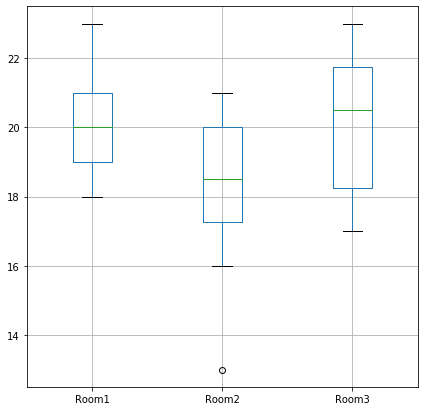

In [359]:
plt.figure(figsize=(7,7))
ppl_age_in_room_df.boxplot()
plt.show()

In [360]:
from statsmodels.formula.api import ols

In [361]:
model_rooms = ols(formula='PPL_Age ~ C(Rooms)',data=ppl_age_in_room_df_melt).fit()

In [362]:
anova_table_rooms = sm.stats.anova_lm(model_rooms,typ=1)

In [363]:
anova_table_rooms

,df,sum_sq,mean_sq,F,PR(>F)
C(Rooms),2.0,24.066667,12.033333,2.865079,0.074407
Residual,27.0,113.400000,4.200000,NaN,NaN


In [364]:
f_critical_rooms = scipy_stats.f(anova_table_rooms['df'][0],anova_table_rooms['df'][1])
f_crit_val_rooms = f_critical_rooms.ppf(0.95)

In [365]:
f_crit_val_rooms

3.3541308285291986

In [366]:
anova_table_rooms['f_critical'] = [f_crit_val_rooms,None]
anova_table_rooms['level_of_sig'] = [0.05,None]

In [367]:
anova_table_rooms

,df,sum_sq,mean_sq,F,PR(>F),f_critical,level_of_sig
C(Rooms),2.0,24.066667,12.033333,2.865079,0.074407,3.354131,0.05
Residual,27.0,113.400000,4.200000,NaN,NaN,NaN,NaN


In [368]:
ppl_age_in_room_df

,Room1,Room2,Room3
0,18,18,21
1,19,20,22
2,20,16,17
3,21,20,18
4,22,21,22
5,23,20,19
6,18,18,21
7,19,19,20
8,20,17,18
9,21,13,23


In [369]:
test_df = {}

for col in ppl_age_in_room_df.columns:
    test_df[col] = {np.shape(ppl_age_in_room_df[col])[0],
             np.sum(ppl_age_in_room_df[col]),
             np.mean(ppl_age_in_room_df[col]),
             np.var(ppl_age_in_room_df[col]),
             np.std(ppl_age_in_room_df[col])}

In [370]:
test_df

{'Room1': {1.57797338380595, 2.49, 10, 20.1, 201},
 'Room2': {2.2715633383201093, 5.16, 10, 18.2, 182},
 'Room3': {1.9209372712298547, 3.69, 10, 20.1, 201}}

In [371]:
test_df.values()

dict_values([{1.57797338380595, 2.49, 201, 10, 20.1}, {2.2715633383201093, 5.16, 10, 18.2, 182}, {1.9209372712298547, 3.69, 201, 10, 20.1}])

In [372]:
pd.DataFrame(test_df.values())

,0,1,2,3,4
0,1.577973,2.49,201,10.0,20.1
1,2.271563,5.16,10,18.2,182.0
2,1.920937,3.69,201,10.0,20.1


In [373]:
np.var(ppl_age_in_room_df['Room2']),
np.var(ppl_age_in_room_df['Room3'])

3.69

## **``Batsmen Dataset``**

In [374]:
anova_test_data1 = pd.DataFrame({'Sehwag':[25,30,28,36,29], 'Sachin':[45,55,29,56,40], 'Virat':[30,29,33,37,27], 
                                'Dhoni':[54,60,51,62,73]})

In [375]:
anova_test_data1

,Sehwag,Sachin,Virat,Dhoni
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


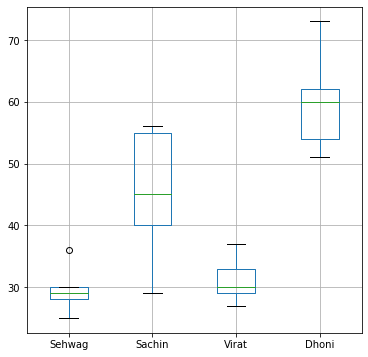

In [376]:
plt.figure(figsize=(6,6))
anova_test_data1.boxplot()
plt.show()

In [377]:
test_sts, p_val = scipy_stats.f_oneway(anova_test_data1['Sehwag'],anova_test_data1['Sachin'],anova_test_data1['Virat'],anova_test_data1['Dhoni'])

In [378]:
test_sts, p_val

(17.492810457516338, 2.639241146210922e-05)

In [379]:
from statsmodels.formula.api import ols

In [380]:
melt_dataset = pd.melt(anova_test_data1.reset_index(),id_vars=['index'],value_vars=['Sehwag','Sachin','Virat','Dhoni']
                       ,var_name='Batsmen',value_name='Runs_Scored')

In [381]:
melt_dataset.head(10)

,index,Batsmen,Runs_Scored
0,0,Sehwag,25
1,1,Sehwag,30
2,2,Sehwag,28
3,3,Sehwag,36
4,4,Sehwag,29
5,0,Sachin,45
6,1,Sachin,55
7,2,Sachin,29
8,3,Sachin,56
9,4,Sachin,40


In [382]:
model = ols('Runs_Scored ~ C(Batsmen)',data=melt_dataset).fit()

In [383]:
anova_table = sm.stats.anova_lm(model,typ=1)

In [384]:
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Batsmen),3.0,3010.95,1003.650,17.49281,0.000026
Residual,16.0,918.00,57.375,NaN,NaN


In [385]:
f_dist = scipy_stats.f(anova_table['df'][0],anova_table['df'][1])

In [386]:
f_critical = f_dist.ppf(0.95)

In [387]:
f_critical

3.238871517453585

In [388]:
anova_table['f_critical'] = [f_critical,None]
anova_table['Level_of_Sig'] = [0.05,None]

In [389]:
anova_table

,df,sum_sq,mean_sq,F,PR(>F),f_critical,Level_of_Sig
C(Batsmen),3.0,3010.95,1003.650,17.49281,0.000026,3.238872,0.05
Residual,16.0,918.00,57.375,NaN,NaN,NaN,NaN


![q1](ANOVA_questions\Book_Question1.png)

- Selenium content of raw venison (VEN), 
- Squirrel meat (SQU), 
- Region-raised beef (RRB) and
- Nonregion-raised beef (NRB)

In [419]:
meat_grps_selenium_lvls = pd.read_csv("ANOVA_questions\ch08_all\EXA_C08_S02_01.csv")

In [420]:
meat_grps_selenium_lvls.head()

,VEN,SQU,RRB,NRB
0,26.72,37.42,11.23,44.33
1,28.58,56.46,29.63,76.86
2,29.71,51.91,20.42,4.45
3,26.95,62.73,10.12,55.01
4,10.97,4.55,39.91,58.21


#### ***Brief description on how the dataset looks like? In terms of Observations, Mean, S.D and Quantiles.*** 

In [421]:
meat_grps_selenium_lvls.describe(include='all')

,VEN,SQU,RRB,NRB
count,42.000000,53.000000,30.000000,19.000000
mean,25.875476,37.416981,28.522333,62.046316
std,8.032421,17.046761,11.525674,31.149825
min,8.700000,4.550000,10.120000,4.450000
25%,21.370000,26.520000,20.187500,46.340000
50%,26.300000,35.880000,27.770000,66.360000
75%,31.425000,44.200000,32.652500,75.790000
max,45.080000,87.500000,56.610000,139.090000


In [618]:
meat_grps_selenium_lvls_grand_mean = np.mean([np.mean(meat_grps_selenium_lvls['VEN']),
                                             np.mean(meat_grps_selenium_lvls['SQU']),
                                             np.mean(meat_grps_selenium_lvls['RRB']),
                                             np.mean(meat_grps_selenium_lvls['NRB'])])

In [619]:
meat_grps_selenium_lvls_grand_mean

38.465276611339675

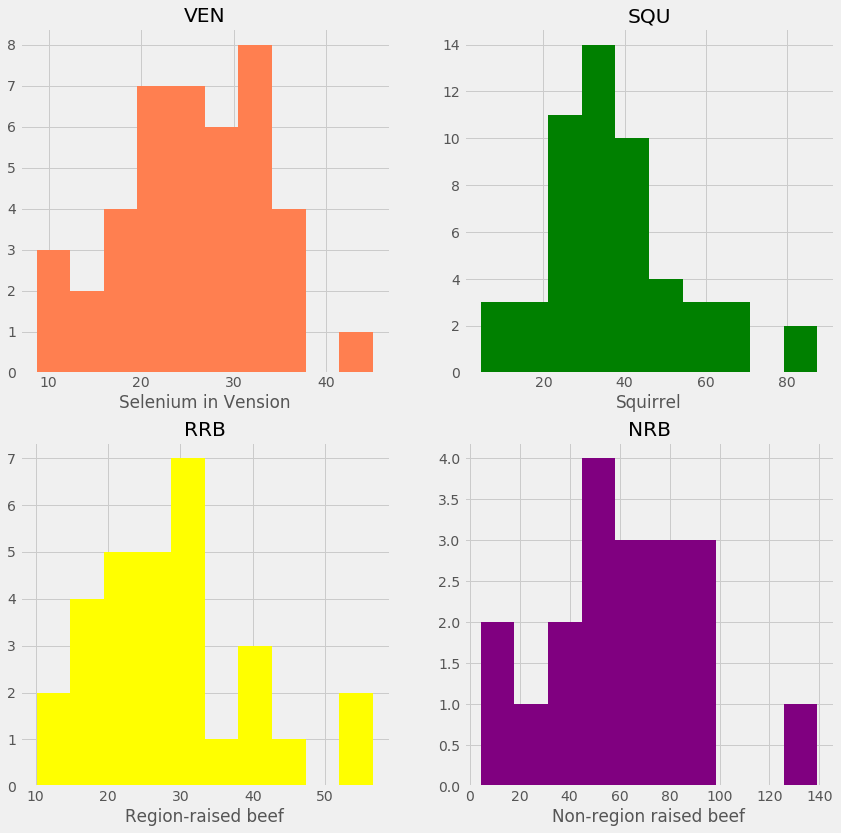

In [587]:
fig,ax = plt.subplots(2,2,figsize=(13,13))
ax[0,0].hist(meat_grps_selenium_lvls[~meat_grps_selenium_lvls['VEN'].isna()]['VEN'],color='coral')
ax[0,0].set_title('VEN')
ax[0,0].set(xlabel='Selenium in Vension')
ax[0,1].hist(meat_grps_selenium_lvls[~meat_grps_selenium_lvls['SQU'].isna()]['SQU'],color='green')
ax[0,1].set_title('SQU')
ax[0,1].set(xlabel='Squirrel')
ax[1,0].hist(meat_grps_selenium_lvls[~meat_grps_selenium_lvls['RRB'].isna()]['RRB'],color='yellow')
ax[1,0].set_title('RRB')
ax[1,0].set(xlabel='Region-raised beef')
ax[1,1].hist(meat_grps_selenium_lvls[~meat_grps_selenium_lvls['NRB'].isna()]['NRB'],color='purple')
ax[1,1].set_title('NRB')
ax[1,1].set(xlabel='Non-region raised beef')
plt.show()

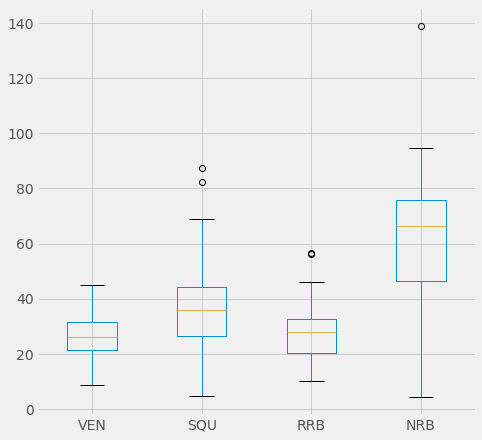

In [491]:
plt.figure(figsize=(7,7))
meat_grps_selenium_lvls.boxplot()
plt.show()

In [492]:
from scipy.stats import probplot as qqplt
import stemgraphic as stemg

In [572]:
stemg.stem_dot(df=meat_grps_selenium_lvls, column='VEN',flip_axes=True,compact=False,scale=1)


                                      
                                      
                 ●                    
             ●●  ●●  ●   ●            
      ●   ●  ●●  ●●● ● ●●●   ●        
● ●●  ● ● ●●●●●  ●●●●●●●●● ●●●       ●
--------------------------------------⇪
                                      
89012345678901234567890123456789012345
  111111111122222222223333333333444444
                                      
Scale: 
45|1 => 45.1x1 = 45.1 


In [558]:
stemg.stem_dot(df=meat_grps_selenium_lvls,column='SQU',flip_axes=True,compact=False,scale=1)


                                                                                    
                                 ●                                                  
                     ●    ●      ●●                                                 
         ●        ●  ●  ● ● ● ●● ●●●         ●                                      
●    ●●  ●    ●   ●●●●●●● ● ●●●● ●●●●●● ● ●  ●●●    ● ●  ●● ●    ●            ●    ●
------------------------------------------------------------------------------------⇪
                                                                                    
456789012345678901234567890123456789012345678901234567890123456789012345678901234567
      111111111122222222223333333333444444444455555555556666666666777777777788888888
                                                                                    
Scale: 
87|5 => 87.5x1 = 87.5 


In [559]:
stemg.stem_dot(df=meat_grps_selenium_lvls,column='RRB',flip_axes=True,compact=False,scale=1)


                                               
                                               
                                               
                 ●                             
          ●      ● ●  ●                       ●
●●   ●●●●●●●● ●● ●●●●●●   ● ●●●     ●         ●
-----------------------------------------------⇪
                                               
01234567890123456789012345678901234567890123456
11111111112222222222333333333344444444445555555
                                               
Scale: 
56|2 => 56.2x1 = 56.2 


In [561]:
stemg.stem_dot(df=meat_grps_selenium_lvls,column='NRB',flip_axes=True,compact=False,scale=1)


                                                                                                                                        
                                                                                                                                        
                                                                                                                                        
                                                                                                                                        
                                                                                                                                        
                                                                                                                                        
●      ●              ●          ●      ●   ● ●    ●  ●       ●  ● ●● ● ●          ●  ●   ●                                            ●
----------------------------------------

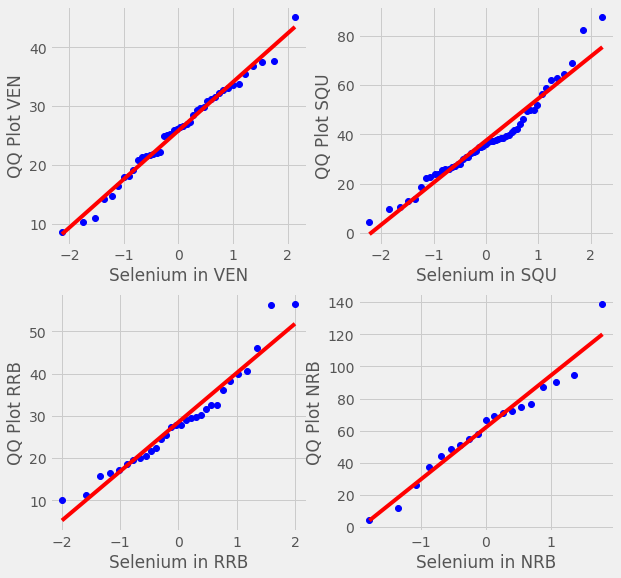

In [577]:
fig,axs = plt.subplots(2,2,figsize=(9,9))
qqplt(meat_grps_selenium_lvls[~meat_grps_selenium_lvls['VEN'].isna()]['VEN'],plot=axs[0,0])
axs[0,0].set(xlabel='Selenium in VEN',ylabel='QQ Plot VEN')
axs[0,0].set_title(None)
qqplt(meat_grps_selenium_lvls[~meat_grps_selenium_lvls['SQU'].isna()]['SQU'],plot=axs[0,1])
axs[0,1].set(xlabel='Selenium in SQU',ylabel='QQ Plot SQU')
axs[0,1].set_title(None)
qqplt(meat_grps_selenium_lvls[~meat_grps_selenium_lvls['RRB'].isna()]['RRB'],plot=axs[1,0])
axs[1,0].set(xlabel='Selenium in RRB',ylabel='QQ Plot RRB')
axs[1,0].set_title(None)
qqplt(meat_grps_selenium_lvls[~meat_grps_selenium_lvls['NRB'].isna()]['NRB'],plot=axs[1,1])
axs[1,1].set(xlabel='Selenium in NRB',ylabel='QQ Plot NRB')
axs[1,1].set_title(None)
plt.show()

In [578]:
from scipy.stats import f_oneway as anova_one_way

In [583]:
meat_grps_selenium_lvls_results = anova_one_way(meat_grps_selenium_lvls[~meat_grps_selenium_lvls['VEN'].isna()]['VEN'],
              meat_grps_selenium_lvls[~meat_grps_selenium_lvls['SQU'].isna()]['SQU'],
              meat_grps_selenium_lvls[~meat_grps_selenium_lvls['RRB'].isna()]['RRB'],
              meat_grps_selenium_lvls[~meat_grps_selenium_lvls['NRB'].isna()]['NRB'])

In [584]:
meat_grps_selenium_lvls_results

F_onewayResult(statistic=22.614240618405063, pvalue=5.34452561848709e-12)

In [593]:
meat_grps_selenium_lvls_melt = pd.melt(meat_grps_selenium_lvls.reset_index(),id_vars='index',value_vars=['VEN','SQU','RRB','NRB'],var_name='Meat_Groups',value_name='Selenium_Level')
meat_grps_selenium_lvls_melt.dropna(inplace=True)

In [594]:
meat_grps_selenium_lvls_melt.head(10)

,index,Meat_Groups,Selenium_Level
0,0,VEN,26.72
1,1,VEN,28.58
2,2,VEN,29.71
3,3,VEN,26.95
4,4,VEN,10.97
5,5,VEN,21.97
6,6,VEN,14.35
7,7,VEN,32.21
8,8,VEN,19.19
9,9,VEN,30.92


In [591]:
from statsmodels.formula.api import ols

In [597]:
meat_grps_selenium_lvls_model = ols('Selenium_Level ~ C(Meat_Groups)',data=meat_grps_selenium_lvls_melt).fit()

In [598]:
import statsmodels.api as sm

In [610]:
meat_grps_selenium_lvls_anova_table = sm.stats.anova_lm(meat_grps_selenium_lvls_model)

In [611]:
meat_grps_selenium_lvls_anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Meat_Groups),3.0,18934.953261,6311.651087,22.614241,5.344526e-12
Residual,140.0,39074.102336,279.100731,NaN,NaN


In [612]:
from scipy import stats as sc_sts

In [613]:
f_dist_meat = sc_sts.f(meat_grps_selenium_lvls_anova_table['df'][0],meat_grps_selenium_lvls_anova_table['df'][1])

In [614]:
f_critical_meat = f_dist_meat.ppf(0.95)

In [615]:
meat_grps_selenium_lvls_anova_table['alpha'] = [0.05,None]
meat_grps_selenium_lvls_anova_table['F_crit'] = [f_critical_meat,None]

In [616]:
meat_grps_selenium_lvls_anova_table

,df,sum_sq,mean_sq,F,PR(>F),alpha,F_crit
C(Meat_Groups),3.0,18934.953261,6311.651087,22.614241,5.344526e-12,0.05,2.669256
Residual,140.0,39074.102336,279.100731,NaN,NaN,NaN,NaN


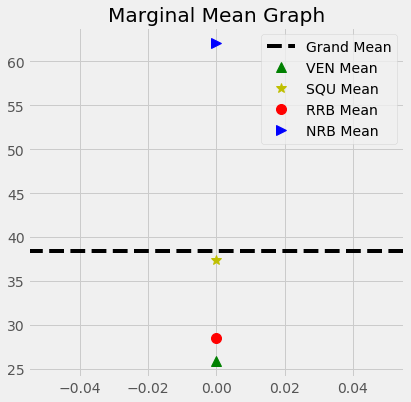

In [677]:
plt.figure(figsize=(6,6))
plt.axhline(y=38.4,linestyle='--',color='black',label='Grand Mean')
plt.plot(np.mean(meat_grps_selenium_lvls['VEN']),'go',marker='^',markersize=10,label='VEN Mean')
plt.plot(np.mean(meat_grps_selenium_lvls['SQU']),'yo',marker='*',markersize=10,label='SQU Mean')
plt.plot(np.mean(meat_grps_selenium_lvls['RRB']),'ro',marker='o',markersize=10,label='RRB Mean')
plt.plot(np.mean(meat_grps_selenium_lvls['NRB']),'bo',marker='>',markersize=10,label='NRB Mean')
plt.title('Marginal Mean Graph')
plt.legend()
plt.show()

## **``Post-Hoc Analysis``**

### ***Tukey HSD :: Honestly Significant Test*** 

In [678]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [680]:
tk_hsd_ms_comp = pairwise_tukeyhsd(endog=meat_grps_selenium_lvls_melt['Selenium_Level'],groups=meat_grps_selenium_lvls_melt['Meat_Groups'],alpha=0.05)

In [688]:
tk_hsd_ms_comp.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
NRB,RRB,-33.524,0.001,-46.261,-20.7869,True
NRB,SQU,-24.6293,0.001,-36.2454,-13.0133,True
NRB,VEN,-36.1708,0.001,-48.1816,-24.16,True
RRB,SQU,8.8946,0.0961,-1.0308,18.8201,False
RRB,VEN,-2.6469,0.9,-13.0314,7.7377,False
SQU,VEN,-11.5415,0.0058,-20.5159,-2.5671,True


In [689]:
!pip install scikit-posthocs

You should consider upgrading via the 'c:\programdata\anaconda3\python.exe -m pip install --upgrade pip' command.


In [693]:
import scikit_posthocs as pst_hocs

In [694]:
pst_hocs.posthoc_scheffe(meat_grps_selenium_lvls_melt,val_col='Selenium_Level',group_col='Meat_Groups',)

,VEN,SQU,RRB,NRB
VEN,-1.000000e+00,0.012876,9.318290e-01,4.811816e-11
SQU,1.287554e-02,-1.000000,1.481170e-01,4.395048e-06
RRB,9.318290e-01,0.148117,-1.000000e+00,8.158832e-09
NRB,4.811816e-11,0.000004,8.158832e-09,-1.000000e+00


## **``Distribution_Functions``**

## ***Understanding*** 
- ``PDF`` **(Probability Distribution/Density Function)** and ``LOGPDF``
- ``CDF`` **(Cumulative Distribution/Density Function)** and ``LOGCDF`` 
- ``PPF`` **(Percent Point Function)** and ``LOGPPF`` 
- ``SF`` **(Survival Function)** and ``ISF``
- ``INTERVAL``

In [390]:
from scipy.stats import norm as nm

In [391]:
beer_cans_production_progression = np.array([200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000,
                                           1050,1100,1150,1200,1250,1300,1350,1400,1450,1500,1550,1600,1650,1700,
                                           1750,1800,1850,1900,1950,2000,2050])

In [392]:
len(beer_cans_production_progression)

38

#### **So, the above numpy array is representing the increase in the factory production of beer cans over last 38 days.**

In [393]:
beer_cans_production_progression_normalized = scipy_tests.zscore(beer_cans_production_progression)

In [394]:
beer_cans_production_progression_normalized

array([-1.68705478, -1.59586263, -1.50467048, -1.41347833, -1.32228618,
       -1.23109403, -1.13990188, -1.04870973, -0.95751758, -0.86632543,
       -0.77513328, -0.68394113, -0.59274898, -0.50155683, -0.41036468,
       -0.31917253, -0.22798038, -0.13678823, -0.04559608,  0.04559608,
        0.13678823,  0.22798038,  0.31917253,  0.41036468,  0.50155683,
        0.59274898,  0.68394113,  0.77513328,  0.86632543,  0.95751758,
        1.04870973,  1.13990188,  1.23109403,  1.32228618,  1.41347833,
        1.50467048,  1.59586263,  1.68705478])

In [395]:
# X-axis from -4 to +4 evenly spaced numbers with length same as data
x_axis_array = np.linspace(-4,4,num=len(beer_cans_production_progression))

# Font style for labelling 
font_style = {'color':'purple','size':'14'}

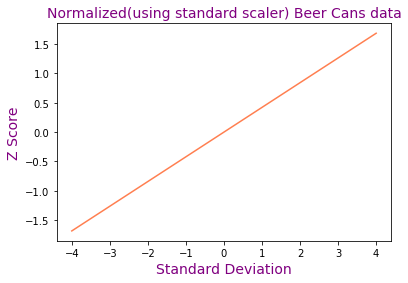

In [396]:
fig,ax = plt.subplots()

# Plotting the Normalized Beer Cans Data
ax.plot(x_axis_array,beer_cans_production_progression_normalized,color='coral')
ax.set_title('Normalized(using standard scaler) Beer Cans data',fontdict=font_style)
ax.set_xlabel("Standard Deviation",fontdict=font_style)
ax.set_ylabel("Z Score",fontdict=font_style)
plt.show()

## ***``Probability Distribution/Density Function``***
- **It is function which represents the probability of a point between a certain interval. And, for calculating the probability it follows the concept of drawing a tangent(line) then Rise/Run.**
- **One important point to be noted here as the probability of a specific value would always be 0.**

In [397]:
pdf_array = nm.pdf(beer_cans_production_progression_normalized,loc=0,scale=1)

In [398]:
pdf_array

array([0.09613369, 0.11165659, 0.128612  , 0.1469153 , 0.16643359,
       0.18698352, 0.20833109, 0.2301936 , 0.25224398, 0.27411751,
       0.29542085, 0.31574313, 0.33466869, 0.35179095, 0.3667268 ,
       0.37913077, 0.38870831, 0.39522738, 0.39852779, 0.39852779,
       0.39522738, 0.38870831, 0.37913077, 0.3667268 , 0.35179095,
       0.33466869, 0.31574313, 0.29542085, 0.27411751, 0.25224398,
       0.2301936 , 0.20833109, 0.18698352, 0.16643359, 0.1469153 ,
       0.128612  , 0.11165659, 0.09613369])

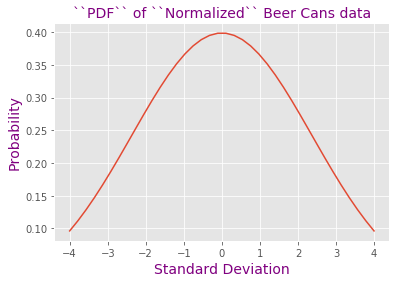

In [399]:
plt.style.use('ggplot')
fig,ax = plt.subplots(1,1)

# Plotting the Probability Distribution/Density Function 
ax.plot(x_axis_array,pdf_array)
ax.set_title("``PDF`` of ``Normalized`` Beer Cans data",fontdict=font_style)
ax.set_xlabel("Standard Deviation",fontdict=font_style)
ax.set_ylabel("Probability",fontdict=font_style)
plt.show()

## ***``Log of Probability Distribution Function``***

In [400]:
logpdf_norm_data = nm.logpdf(beer_cans_production_progression_normalized)

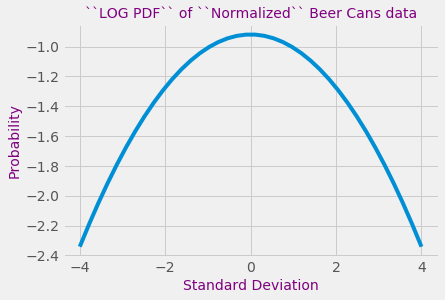

In [401]:
plt.style.use('fivethirtyeight')
fig,ax = plt.subplots(1,1)
ax.plot(x_axis_array,logpdf_norm_data)
ax.set_title("``LOG PDF`` of ``Normalized`` Beer Cans data",fontdict=font_style)
ax.set_xlabel("Standard Deviation",fontdict=font_style)
ax.set_ylabel("Probability",fontdict=font_style)
plt.show()

## ***``Cumulative Distribution Function``***

In [402]:
cdf_beer_cans_production_progression_normalized = nm.cdf(beer_cans_production_progression_normalized,loc=0,scale=1)

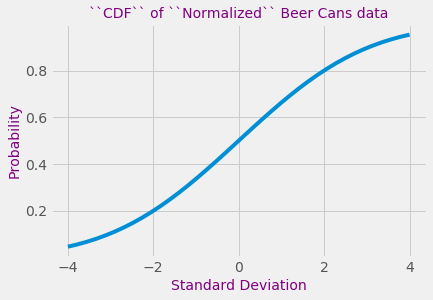

In [403]:
fig,ax = plt.subplots()
ax.plot(x_axis_array,cdf_beer_cans_production_progression_normalized)
ax.set_title("``CDF`` of ``Normalized`` Beer Cans data",fontdict=font_style)
ax.set_xlabel("Standard Deviation",fontdict=font_style)
ax.set_ylabel("Probability",fontdict=font_style)
plt.show()

## ***``Log Cumulative Distribution Function``***

In [404]:
log_cdf_beer_cans_production_progression_normalized = nm.logcdf(beer_cans_production_progression_normalized,loc=0,scale=1)

In [405]:
log_cdf_beer_cans_production_progression_normalized

array([-3.0835496 , -2.89571079, -2.71500824, -2.54138096, -2.37476408,
       -2.21508855, -2.06228091, -1.91626293, -1.77695142, -1.64425784,
       -1.51808805, -1.39834196, -1.28491327, -1.17768911, -1.07654979,
       -0.98136848, -0.89201101, -0.80833562, -0.73019278, -0.65742508,
       -0.5898672 , -0.52734592, -0.46968023, -0.41668162, -0.36815436,
       -0.32389606, -0.28369825, -0.24734718, -0.21462477, -0.18530966,
       -0.15917848, -0.13600713, -0.11557231, -0.097653  , -0.08203205,
       -0.06849772, -0.05684524, -0.04687822])

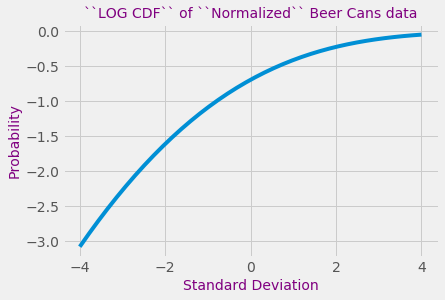

In [406]:
fig,ax = plt.subplots()
ax.plot(x_axis_array,log_cdf_beer_cans_production_progression_normalized)
ax.set_title("``LOG CDF`` of ``Normalized`` Beer Cans data",fontdict=font_style)
ax.set_xlabel("Standard Deviation",fontdict=font_style)
ax.set_ylabel("Probability",fontdict=font_style)
plt.show()

## ***``Survival Distribution Function``***

In [407]:
survival_beer_data = nm.sf(beer_cans_production_progression_normalized)

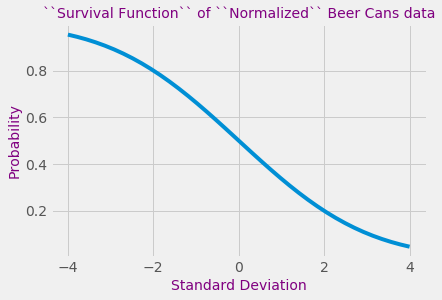

In [408]:
fig,ax = plt.subplots()
ax.plot(x_axis_array,survival_beer_data)
ax.set_title("``Survival Function`` of ``Normalized`` Beer Cans data",fontdict=font_style)
ax.set_xlabel("Standard Deviation",fontdict=font_style)
ax.set_ylabel("Probability",fontdict=font_style)
plt.show()

## ***``Log Survival Distribution Function``***

In [409]:
log_survival_beer_data = nm.logsf(beer_cans_production_progression_normalized,loc=0,scale=1)

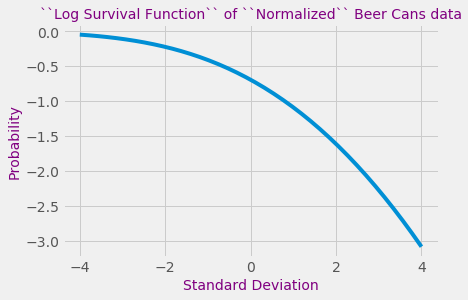

In [410]:
fig,ax = plt.subplots()
ax.plot(x_axis_array,log_survival_beer_data)
ax.set_title("``Log Survival Function`` of ``Normalized`` Beer Cans data",fontdict=font_style)
ax.set_xlabel("Standard Deviation",fontdict=font_style)
ax.set_ylabel("Probability",fontdict=font_style)
plt.show()

## ***``Inverse Survival Distribution Function``***

In [411]:
inv_survival_beer_data = nm.isf(beer_cans_production_progression_normalized,loc=0,scale=1)

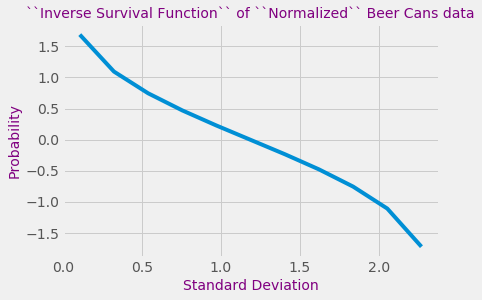

In [412]:
fig,ax = plt.subplots()
ax.plot(x_axis_array,inv_survival_beer_data)
ax.set_title("``Inverse Survival Function`` of ``Normalized`` Beer Cans data",fontdict=font_style)
ax.set_xlabel("Standard Deviation",fontdict=font_style)
ax.set_ylabel("Probability",fontdict=font_style)
plt.show()

## ***``Percent Point Function``***
- **It is inverse of CDF**

In [413]:
ppf_data = nm.ppf(np.linspace(start=0.01,stop=0.99,num=38))

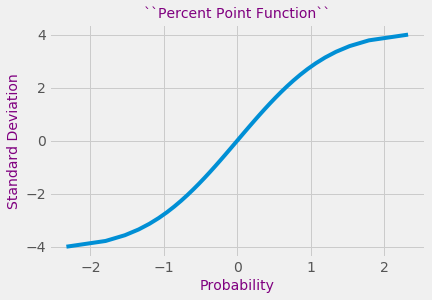

In [414]:
fig,ax = plt.subplots()
ax.plot(ppf_data,x_axis_array)
ax.set_title("``Percent Point Function``",fontdict=font_style)
ax.set_ylabel("Standard Deviation",fontdict=font_style)
ax.set_xlabel("Probability",fontdict=font_style)
plt.show()

### **To be studied**

In [415]:
from statsmodels.stats.weightstats import CompareMeans

In [416]:
CM = CompareMeans(with_brkfst_sample1,with_brkfst_sample2)#.ztest_ind(value=0,alternative='smaller',usevar='unequal')

In [417]:
CM.ztest_ind(value=0,alternative='smaller',usevar='unequal')

AttributeError: 'numpy.ndarray' object has no attribute '_var'

sm.stats.DescrStatsW()

1 + np.random.randn(2,4)

Compare Means